# Question 1 : What motivates business owners to try and start their own business? How does this reason vary from industry?
-   Owner’s reasons for owning the business (REASONOWN)  

----------------------------- 


In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random
import requests
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = None


### Extraction: 


-   Function that returns a dataframe given a url for an api call

In [17]:
#returns a dataframe after you pass in a string url that's valid hopefully

def getDF(apiurl):
    response = requests.get(apiurl)

    col = response.json()[0] # header row

    test = pd.DataFrame(data = response.json(),columns = col) #makes data frame with the header row as column names
    test.drop(0,axis = 0,inplace=True) #it came with the header row that I dropped
    return test

-   Calls the api with url information and key to get a dataframe with reasons business owners own their business
-   Saves the json response to a dataframe

In [18]:
urlUS= "https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_RACE_LABEL,OWNER_SEX_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP&for=us:*&QDESC_LABEL="
label = "REASONOWN"
key ="&key=7325759f1ae7120e7f55c22ccd6fe9de386a7a0c"

fullurlUS= urlUS + label + key


df = getDF(fullurlUS)


----------------------------

### Transform:


-   Filter out the dataframe for the columns we need such as the NAICS2017_LABEL for the industry sectors, the OWNPDEMP for the number of business owners, and OWNCHAR_LABEL for the reasons to own a business

In [19]:
#Get the industry, employee number and reason for business ownership
df = df[['NAICS2017_LABEL','OWNPDEMP','OWNCHAR_LABEL']]
display(df.head(10))


,NAICS2017_LABEL,OWNPDEMP,OWNCHAR_LABEL
1,Total for all sectors,501721,Wanted to be my own boss: Not important
2,Total for all sectors,1049030,Wanted to be my own boss: Somewhat important
3,Total for all sectors,2542285,Wanted to be my own boss: Very important
4,Total for all sectors,694895,Flexible hours: Not important
5,Total for all sectors,1206513,Flexible hours: Somewhat important
6,Total for all sectors,2184862,Flexible hours: Very important
7,Total for all sectors,561767,Balance work and family: Not important
8,Total for all sectors,1212030,Balance work and family: Somewhat important
9,Total for all sectors,2305516,Balance work and family: Very important
10,Total for all sectors,408301,Greater income: Not important


There are many reasons to own and they have a ranking system from Very Important to Somewhat Important to Not Important for each category.
For simplicity, we only want the Very Important label for each reason : Looks like 'Wanted to be my own boss: Very important'
-   1. Filter out the reasons that have 'Very important' by mapping the OWNCHAR_LABEL with a function that will return true if 'Very important' is found in the OWNCHAR_LABEL string or returns false otherwise to use as a filter. Filter our dataframe with 

Because we filtered out for only the very important, our reasons are now not repeated with Reason: Importance status since we only have a single importance status used now. Therefore we can now just throw away 'Very important' in our string for the reasons in OWNCHAR_LABEL because its redundant
-   2. Map each OWNCHAR_LABEL and change the string by splitting out the colon and just taking the first word which would be the reason. Save the OWNCHAR_LABEL as this

Filtered out useless reason labels that do not give much information. Because the label names were changed and taken out, this step must be done after the names were changed
-   3. Filter out the rows with the OWNCHAR_LABEL equals to 'Other' because 'Other' isn't an informative reason.

In [20]:

#filter out only the reason:Very important answers because there's too many!
def filterVeryImportant(x):
    if 'Very important'.lower() in x.lower():
        return True
    else:
        return False
    
    
my_veryimportant_filter = df['OWNCHAR_LABEL'].map(lambda x: filterVeryImportant(x))


df = df[my_veryimportant_filter]
display(df.head(20))



,NAICS2017_LABEL,OWNPDEMP,OWNCHAR_LABEL
3,Total for all sectors,2542285,Wanted to be my own boss: Very important
6,Total for all sectors,2184862,Flexible hours: Very important
9,Total for all sectors,2305516,Balance work and family: Very important
12,Total for all sectors,2534674,Greater income: Very important
15,Total for all sectors,2212856,Best avenue for ideas: Very important
18,Total for all sectors,307603,Couldn't find a job: Very important
21,Total for all sectors,1314042,Work for self: Very important
24,Total for all sectors,1848131,Start my own business: Very important
27,Total for all sectors,1143338,Friend or family role model: Very important
30,Total for all sectors,381983,Other: Very important


In [21]:
#Split out the very important from the answer:very important because its redundant
def changemywords(x):
    l = x.split(":")
    return l[0]
df['OWNCHAR_LABEL'] = df['OWNCHAR_LABEL'].map(lambda x:changemywords(x))
display(df.head(10))
# df.info()


,NAICS2017_LABEL,OWNPDEMP,OWNCHAR_LABEL
3,Total for all sectors,2542285,Wanted to be my own boss
6,Total for all sectors,2184862,Flexible hours
9,Total for all sectors,2305516,Balance work and family
12,Total for all sectors,2534674,Greater income
15,Total for all sectors,2212856,Best avenue for ideas
18,Total for all sectors,307603,Couldn't find a job
21,Total for all sectors,1314042,Work for self
24,Total for all sectors,1848131,Start my own business
27,Total for all sectors,1143338,Friend or family role model
30,Total for all sectors,381983,Other


In [22]:
otherFilter = df['OWNCHAR_LABEL'] != 'Other'
df = df[otherFilter]
display(df.head(10))

,NAICS2017_LABEL,OWNPDEMP,OWNCHAR_LABEL
3,Total for all sectors,2542285,Wanted to be my own boss
6,Total for all sectors,2184862,Flexible hours
9,Total for all sectors,2305516,Balance work and family
12,Total for all sectors,2534674,Greater income
15,Total for all sectors,2212856,Best avenue for ideas
18,Total for all sectors,307603,Couldn't find a job
21,Total for all sectors,1314042,Work for self
24,Total for all sectors,1848131,Start my own business
27,Total for all sectors,1143338,Friend or family role model
33,Total for all sectors,752938,Carry on family business


-   Change the OWNPDEMP column from object to int 64 because we need to plot the number of business owners later

In [23]:

 
#make sure employee amount is an int because I will do math with it   
df['OWNPDEMP'] = df['OWNPDEMP'].astype('int64')
display(df.head(5))

df.info()
# df=df.pivot(index='NAICS2017_LABEL', columns='OWNCHAR_LABEL',values='OWNPDEMP')
# df


,NAICS2017_LABEL,OWNPDEMP,OWNCHAR_LABEL
3,Total for all sectors,2542285,Wanted to be my own boss
6,Total for all sectors,2184862,Flexible hours
9,Total for all sectors,2305516,Balance work and family
12,Total for all sectors,2534674,Greater income
15,Total for all sectors,2212856,Best avenue for ideas


<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 3 to 796
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAICS2017_LABEL  231 non-null    object
 1   OWNPDEMP         231 non-null    int64 
 2   OWNCHAR_LABEL    231 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


We don't want weird double counting, we want the actual industry sectors business owners and the number of business owners that picked which reason to own a business
-   We filter out the NAICS2017_LABEL that is not the 'Total for all sectors' to get all industries that aren't the total type

In [24]:
#get rid of totals because of double counting
total_filter = df['NAICS2017_LABEL'] != 'Total for all sectors'
df =df[total_filter]
display(df.head(10))




,NAICS2017_LABEL,OWNPDEMP,OWNCHAR_LABEL
41,"Agriculture, forestry, fishing and hunting",9917,Wanted to be my own boss
44,"Agriculture, forestry, fishing and hunting",8791,Flexible hours
47,"Agriculture, forestry, fishing and hunting",9549,Balance work and family
50,"Agriculture, forestry, fishing and hunting",10819,Greater income
53,"Agriculture, forestry, fishing and hunting",9012,Best avenue for ideas
56,"Agriculture, forestry, fishing and hunting",991,Couldn't find a job
59,"Agriculture, forestry, fishing and hunting",5256,Work for self
62,"Agriculture, forestry, fishing and hunting",6956,Start my own business
65,"Agriculture, forestry, fishing and hunting",5709,Friend or family role model
71,"Agriculture, forestry, fishing and hunting",5589,Carry on family business


Now that all of our data is filtered the way we want it to, we can pivot so that each reason gets its own column header and the index can be the industry sector with the values being the number of business owners

**This should be the last step**
-   Pivotted the data frame so we can plot some visualizations now

In [25]:
#pivot the table so that the index is now the industry name and each of the values that were the reasons to own are now their own column names
df=df.pivot(index='NAICS2017_LABEL', columns='OWNCHAR_LABEL',values='OWNPDEMP')

df.reset_index()
display(df.head(10))


OWNCHAR_LABEL,Balance work and family,Best avenue for ideas,Carry on family business,Couldn't find a job,Flexible hours,Friend or family role model,Greater income,Help my community,Start my own business,Wanted to be my own boss,Work for self
NAICS2017_LABEL,,,,,,,,,,,
Accommodation and food services,189302,176850,86454,42601,179016,123323,217657,106602,186227,217539,118796
Administrative and support and waste management and remediation services,145728,130290,37625,18578,139506,68044,158977,52441,116772,157823,82224
"Agriculture, forestry, fishing and hunting",9549,9012,5589,991,8791,5709,10819,3262,6956,9917,5256
"Arts, entertainment, and recreation",37927,41007,10580,4448,40228,18043,40979,18726,29980,43850,22042
Construction,319860,299981,115024,43503,287047,155671,359871,107162,262341,344989,182473
Educational services,25990,29056,5367,2514,25918,11754,24862,17979,19183,27017,13427
Finance and insurance,117429,102820,34104,10641,114029,59328,130943,51233,85086,126131,64195
Health care and social assistance,270468,268191,43766,28336,253464,98386,264840,164329,183470,282117,142675
Industries not classified,5732,4320,5152,765,5042,3530,4405,2062,3951,5696,3018


----------------------------

### LOAD : VISUALIZATIONS


-   Optional : sorted the values by the number of business owners for each industry
-   Optional : Add a color dictionary to make your plots correspond to your set colors but you have to write out each of the column names
-   Load a bar chart for each induestry showing the number of business owners for each reason they chose to own a business 


<class 'pandas.core.indexes.base.Index'>


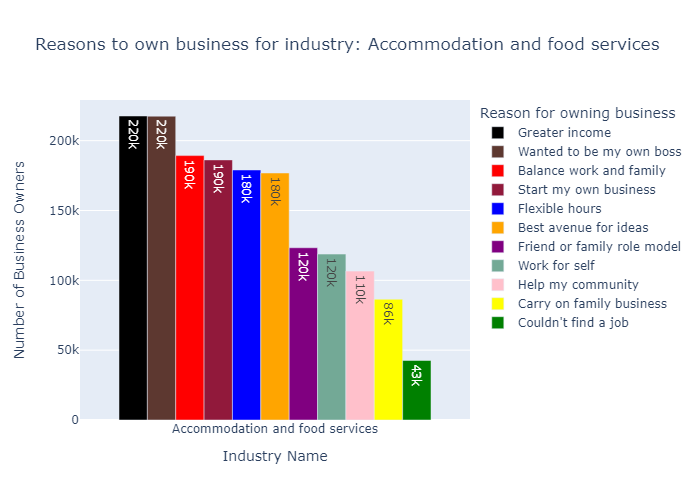

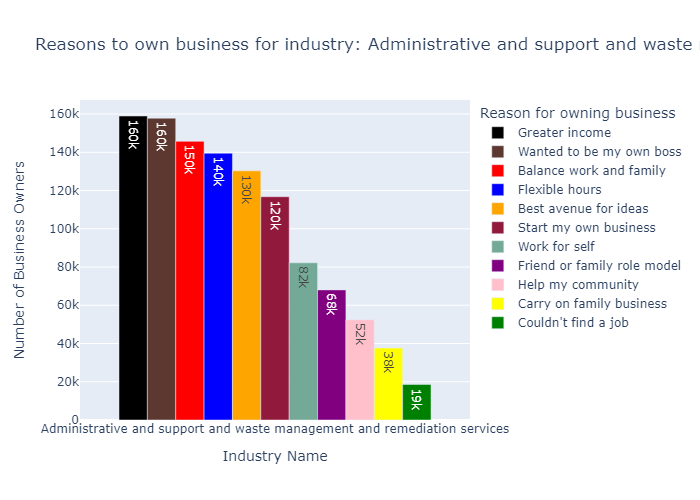

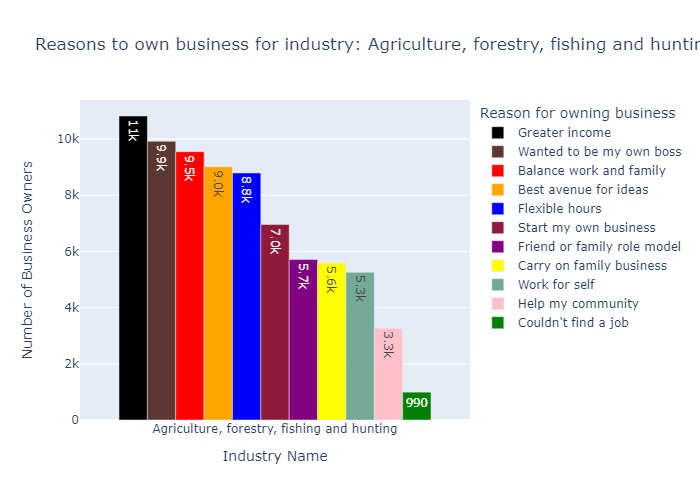

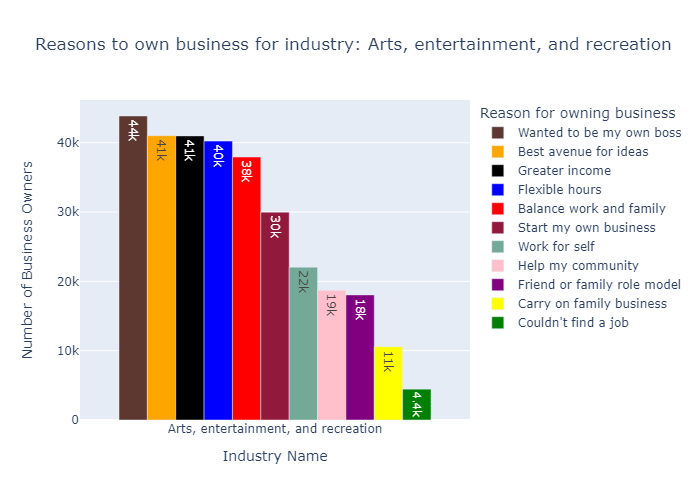

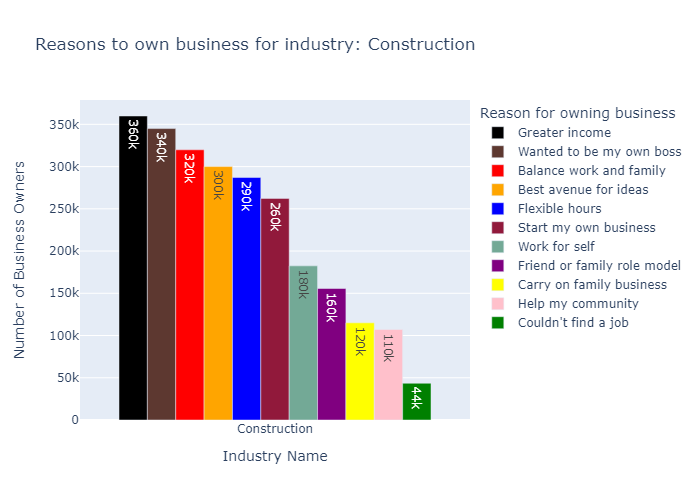

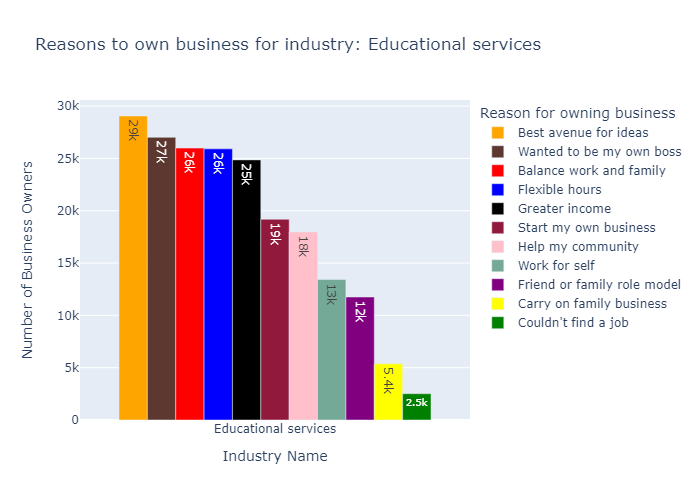

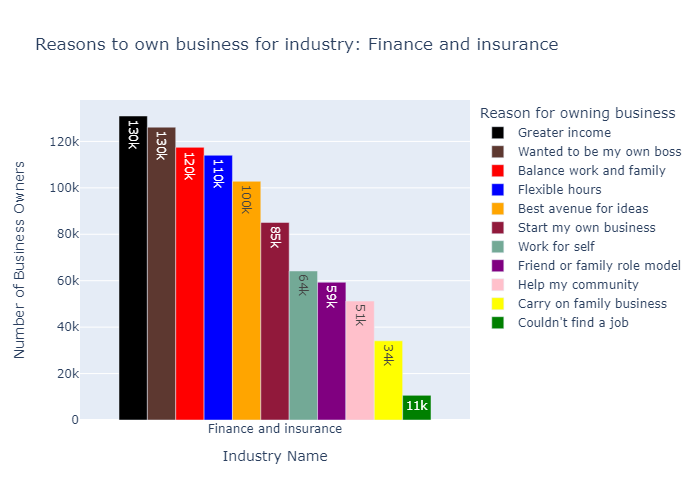

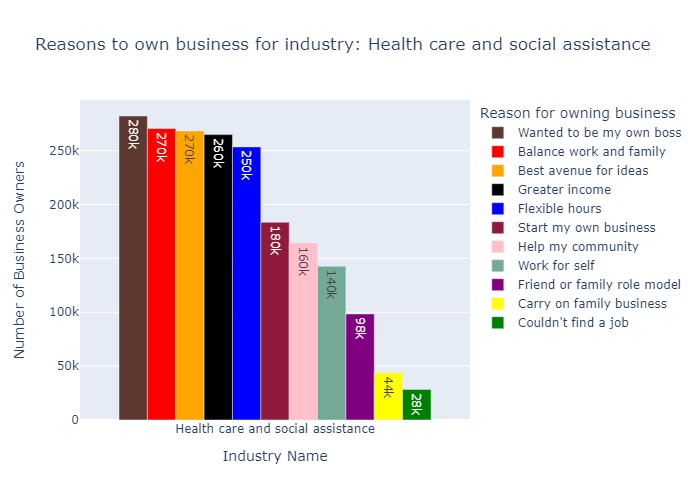

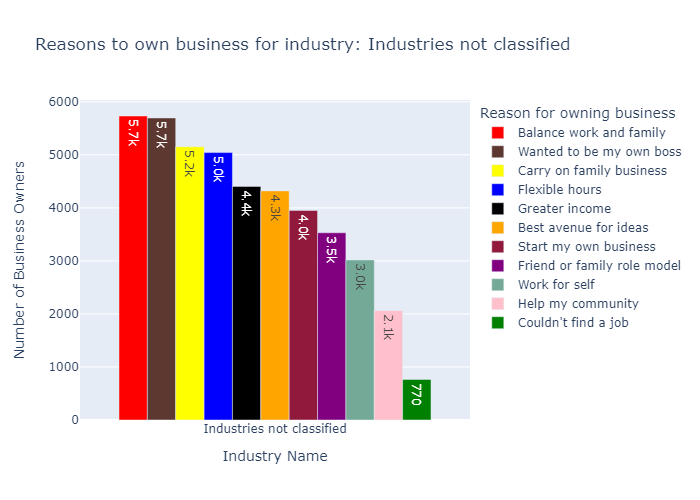

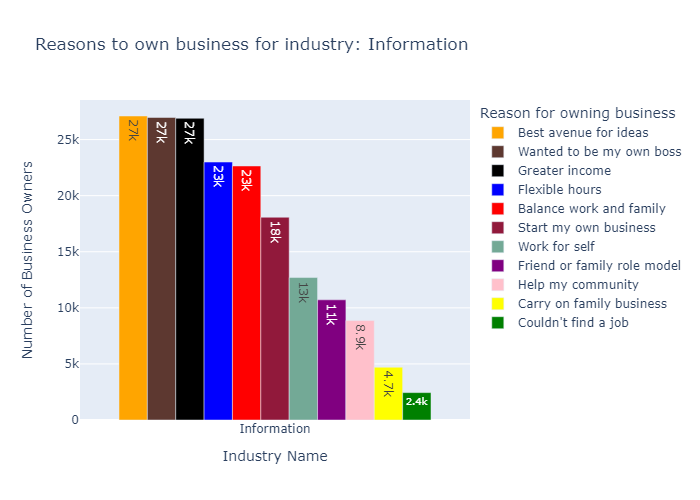

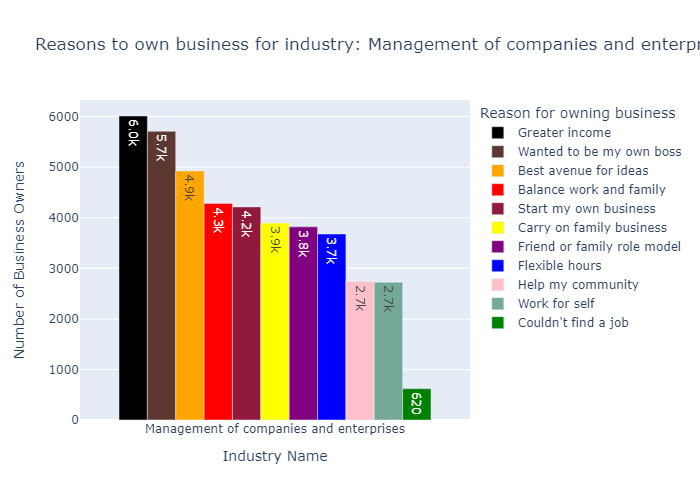

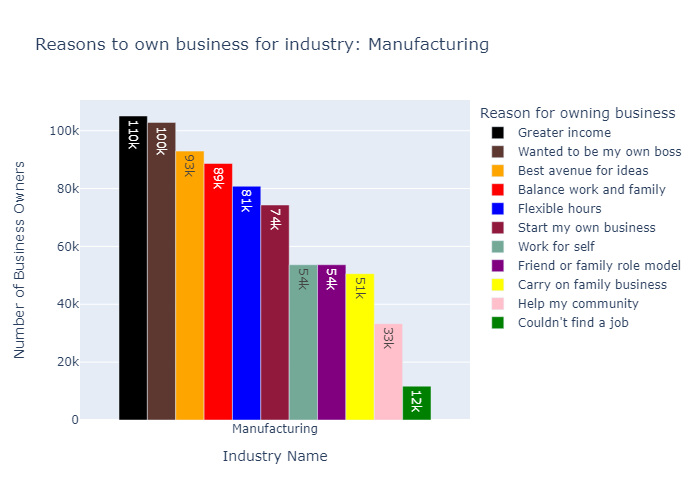

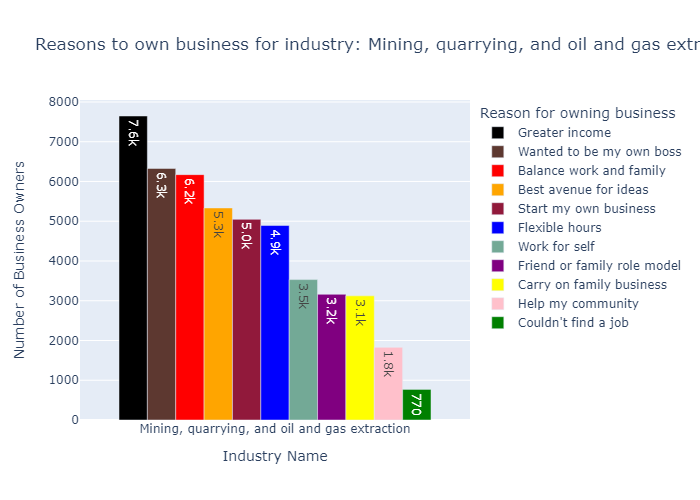

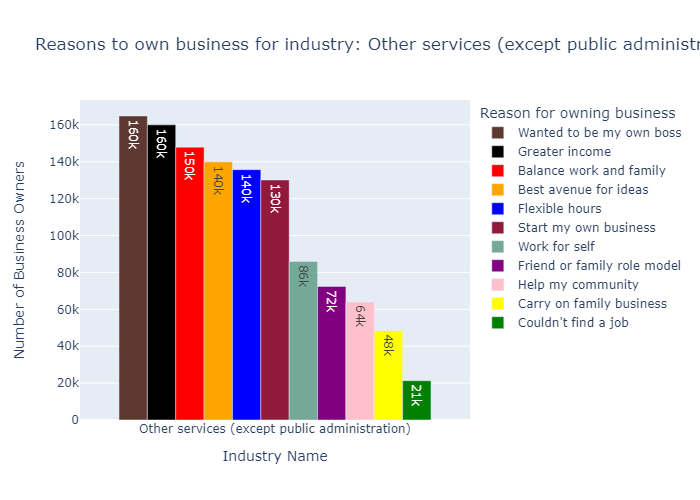

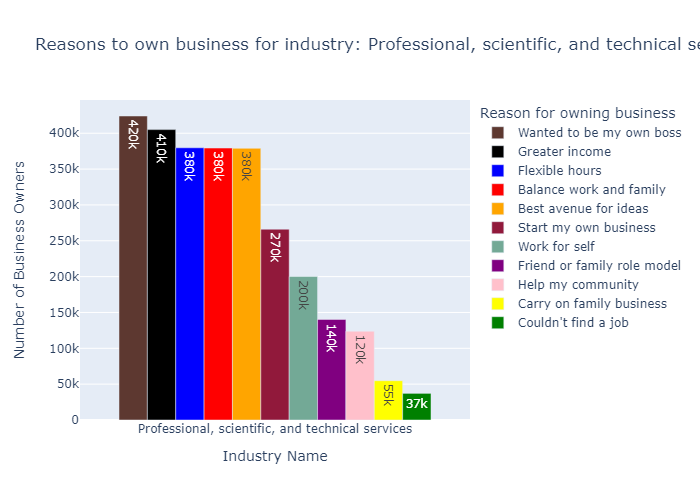

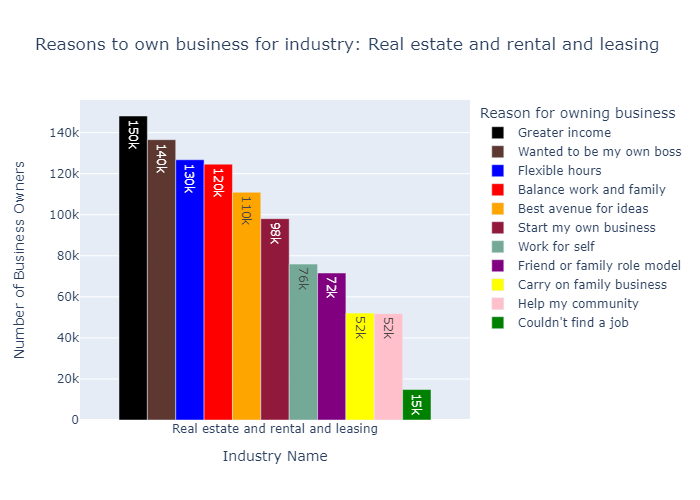

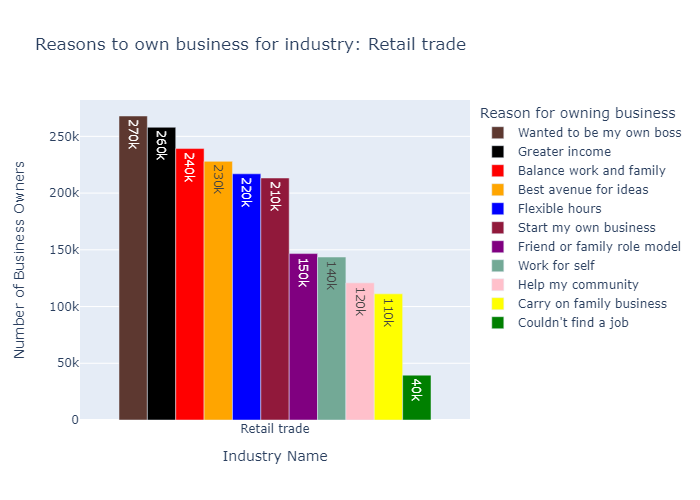

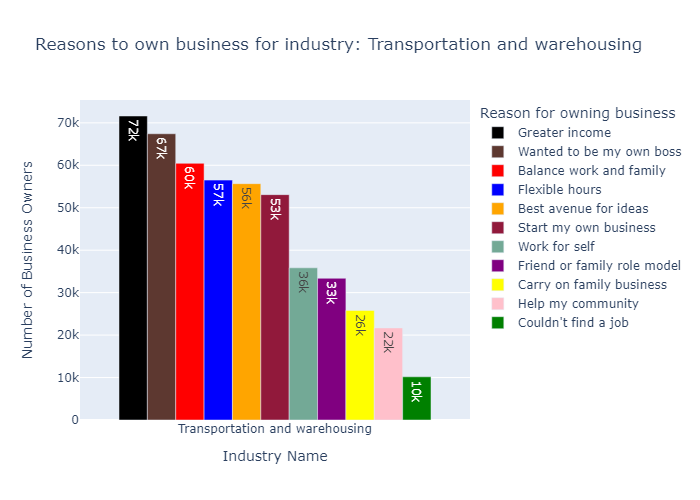

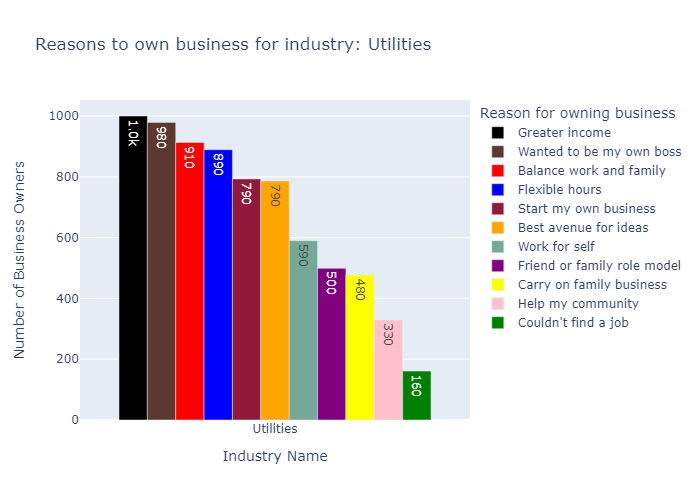

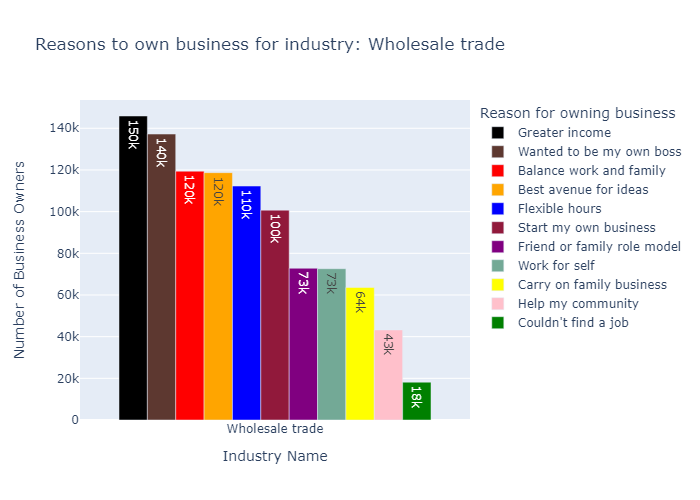

In [26]:
#plot each industry as its own bar chart
cols = df.columns
print(type(cols))

cols_list = [x for x in cols]
count = 0 #count for saving image to file

colormap ={'Balance work and family':'red',
           'Best avenue for ideas':'orange',
           
       'Carry on family business':'yellow',
       "Couldn't find a job":'green',
       'Flexible hours':'blue',
       
       'Friend or family role model':'purple',
       'Greater income':'black',
       'Help my community':'pink',
       'Start my own business':'#91193b ',
       'Wanted to be my own boss':'#5d3830',
       'Work for self':' #73a996 '
           
    
}

#loop through every industry in the index
for i in df.index:
    #get the df for each induestry
    tempdf = df[df.index == i]
    #print(type(tempdf))
    #sort values by row of the name (but theres only one industry name)
    tempdf=tempdf.sort_values(by=i,axis=1,ascending=False)
    #print(tempdf)
    fig = px.bar(tempdf, title=f"Reasons to own business for industry: {i}",text_auto = '.2s',barmode='group', 
                 labels={"NAICS2017_LABEL":"Industry Name", "OWNCHAR_LABEL":"Reason for owning business","value":"Number of Business Owners"},
                 color_discrete_map=colormap
                
            
                 )

    if(count < 3):
        filename = "../images/ReasonToOwnBusinessSingle"
        filename = filename + str(count) + ".png"
        #fig.write_image(filename,format='png',engine='kaleido')
    count +=1
    fig.show("png")

Visualization for proprotions of reasons to own a business relative to other reasons for each industry.
-   For this we need an extra transformation step to make a summation of all the number of business owners for each row 
-   Made a 'mysum' column that sums all the columns of each row

In [27]:

#I'm aggregating the sum across the rows to divide each col by its sum to get a proportion later
df['mysum'] = df.sum(axis=1)
display(df.head())


OWNCHAR_LABEL,Balance work and family,Best avenue for ideas,Carry on family business,Couldn't find a job,Flexible hours,Friend or family role model,Greater income,Help my community,Start my own business,Wanted to be my own boss,Work for self,mysum
NAICS2017_LABEL,,,,,,,,,,,,
Accommodation and food services,189302,176850,86454,42601,179016,123323,217657,106602,186227,217539,118796,1644367
Administrative and support and waste management and remediation services,145728,130290,37625,18578,139506,68044,158977,52441,116772,157823,82224,1108008
"Agriculture, forestry, fishing and hunting",9549,9012,5589,991,8791,5709,10819,3262,6956,9917,5256,75851
"Arts, entertainment, and recreation",37927,41007,10580,4448,40228,18043,40979,18726,29980,43850,22042,307810
Construction,319860,299981,115024,43503,287047,155671,359871,107162,262341,344989,182473,2477922


In [28]:
# df.columns
# df.index


Visualization of each reason for every industry by propotions split into two bar charts for a more appealing visual

Index(['Balance work and family', 'Best avenue for ideas',
       'Carry on family business', 'Couldn't find a job', 'Flexible hours',
       'Friend or family role model', 'Greater income', 'Help my community',
       'Start my own business', 'Wanted to be my own boss', 'Work for self',
       'mysum'],
      dtype='object', name='OWNCHAR_LABEL')


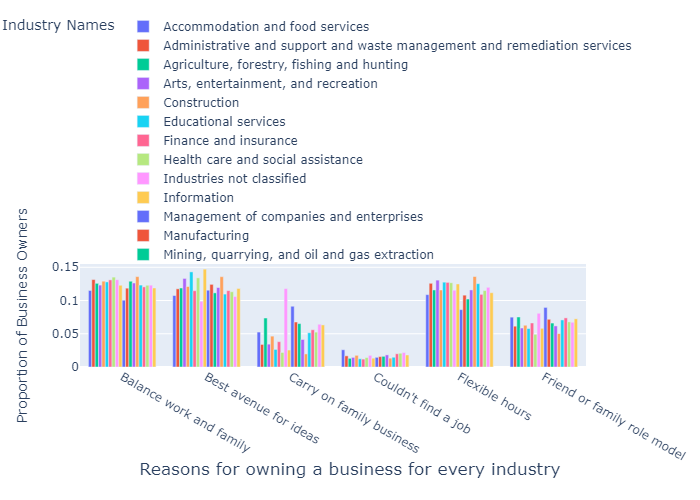

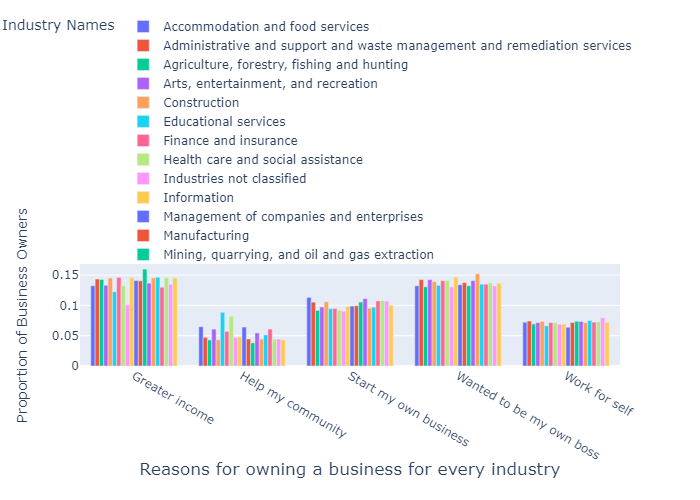

In [29]:

#im plotting a grouped bar chart of the proportions for each reason to make it more clear which reasons stand out for each

cols = df.columns
print(cols)
cols

colsnames = [x for x in cols.values]

"""https://www.w3resource.com/pandas/dataframe/dataframe-pivot.php"""



import plotly.graph_objects as go


#splitting the graph as two since it's a large cluttered graph
firsthalf = colsnames[:6]

last = [colsnames[-1]]

firsthalf = firsthalf + last

secondhalf = colsnames[6:]

firsthalfdf = pd.DataFrame(df, columns =firsthalf)

secondhalfdf = pd.DataFrame(df, columns = secondhalf)

#first half the figure
fig = go.Figure(data=[
    go.Bar(name=index, x=cols[:6], y=row[:len(row)-1].map(lambda x: x/row.mysum)) for index,row in firsthalfdf.iterrows()]
                )
   

# Change the bar mode
fig.update_layout(barmode='group',yaxis_title="Proportion of Business Owners",xaxis_title=" ",
                  legend_title="Industry Names",title={'text':"Reasons for owning a business for every industry",
        'y':0.05,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'bottom'}, legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
#fig.write_image(r"../images/reasontownbusinessgrouped.png",format='png',engine='kaleido')
fig.show("png")

#second half of the figure
fig = go.Figure(data=[
    
    go.Bar(name=index, x=cols[6:-1], y=row[:len(row)-1].map(lambda x: x/row.mysum)) for index,row in secondhalfdf.iterrows()]
                )
   

# Change the bar mode
fig.update_layout(barmode='group',yaxis_title="Proportion of Business Owners",xaxis_title=" ",
                  legend_title="Industry Names",title={'text':"Reasons for owning a business for every industry",
        'y':0.05,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'bottom'}, legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
#fig.write_image(r"../images/reasontownbusinessgrouped.png",format='png',engine='kaleido')
fig.show("png")




The same visualization but all the reasons are shown and not split this time.



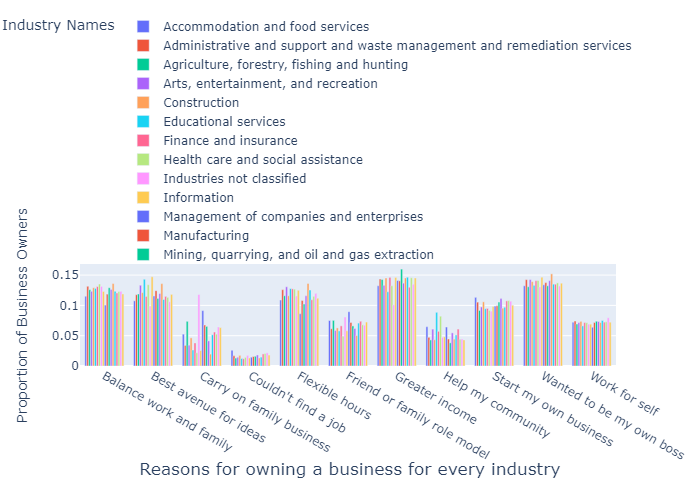

In [30]:
fig = go.Figure(data=[
    
    go.Bar(name=index, x=cols, y=row[:len(row)-1].map(lambda x: x/row.mysum)) for index,row in df.iterrows()]
                )
   

# Change the bar mode
fig.update_layout(barmode='group',yaxis_title="Proportion of Business Owners",xaxis_title=" ",
                  legend_title="Industry Names",title={'text':"Reasons for owning a business for every industry",
        'y':0.05,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'bottom'}, legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1))
#fig.write_image(r"../images/reasontownbusinessgrouped.png",format='png',engine='kaleido')
fig.show("png")